In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
from datetime import timedelta
import textwrap

In [133]:
df1 = pd.read_excel("chips.ods", engine="odf")
df1.head(15)

date                                             Object   n_transistors  \
0   1947                        first transistor, Bell Labs               1   
1   1954                         first silicium transistor                1   
2   1959                                integrated circuits               4   
3   1965                                   CDC 6600 module               64   
4   1971                       first microprocessor (4-bit)            2300   
5   1974                              8-bits microprocessor            6000   
6   1978                            16-bits microprocessors           29000   
7   1982                           32-bits microprocessors           275000   
8   2004                         first dual core processor        233000000   
9   2006                           64-bits microprocessors        291000000   
10  2024                                        modern CPUs    134000000000   
11  2024                                        modern GPUs    208000000000   
12  2040  The future: carbon nanotubes, graphene process...  90000000000000   

    clock_speed_Hz   dimension_m  
0                1  1.000000e-02  
1                1  1.000000e-02  
2            82101  1.000000e-02  
3         10000000  1.000000e-03  
4            60000  1.000000e-05  
5          2000000  6.000000e-06  
6          5000000  3.000000e-06  
7         16000000  1.500000e-06  
8       1300000000  1.300000e-07  
9       2000000000  9.000000e-08  
10      6000000000  5.000000e-09  
11      3500000000  5.000000e-09  
12    100000000000  5.000000e-09

In [134]:
# setting the figure size
width = 8
height = 5
sns.set(rc = {'figure.figsize':(width,height)})
# Plotting with Seaborn
sns.set(style="whitegrid")

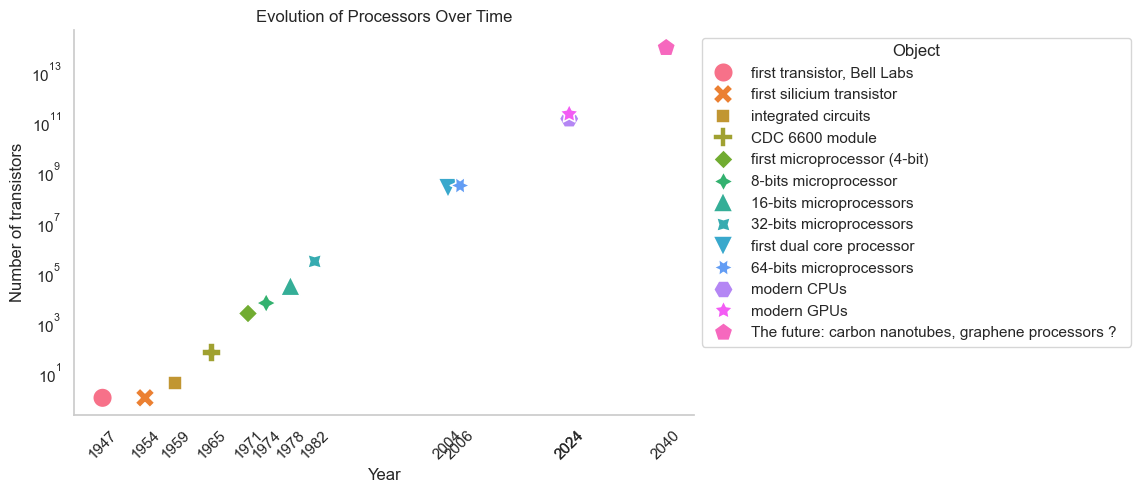

In [136]:
g = sns.scatterplot(data=df1, x='date', y='n_transistors', style = "Object", hue='Object', s=200)
g.set_yscale("log")
g.set(xlabel="Year", ylabel="Number of transistors")
g.set(title='Evolution of Processors Over Time')
plt.xticks(df1['date'],rotation=45)

# adding labels on plot
# for x, y, s in zip(df1['date'], df1['n_transistors'],  df1['name']):
#     g.text(x = x+2, 
#              y = y, 
#              s = s,
#              color='black')
    
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
sns.despine()

plt.grid(False)
plt.savefig('./n_transistors.jpg', dpi=300, bbox_inches='tight')
plt.show()

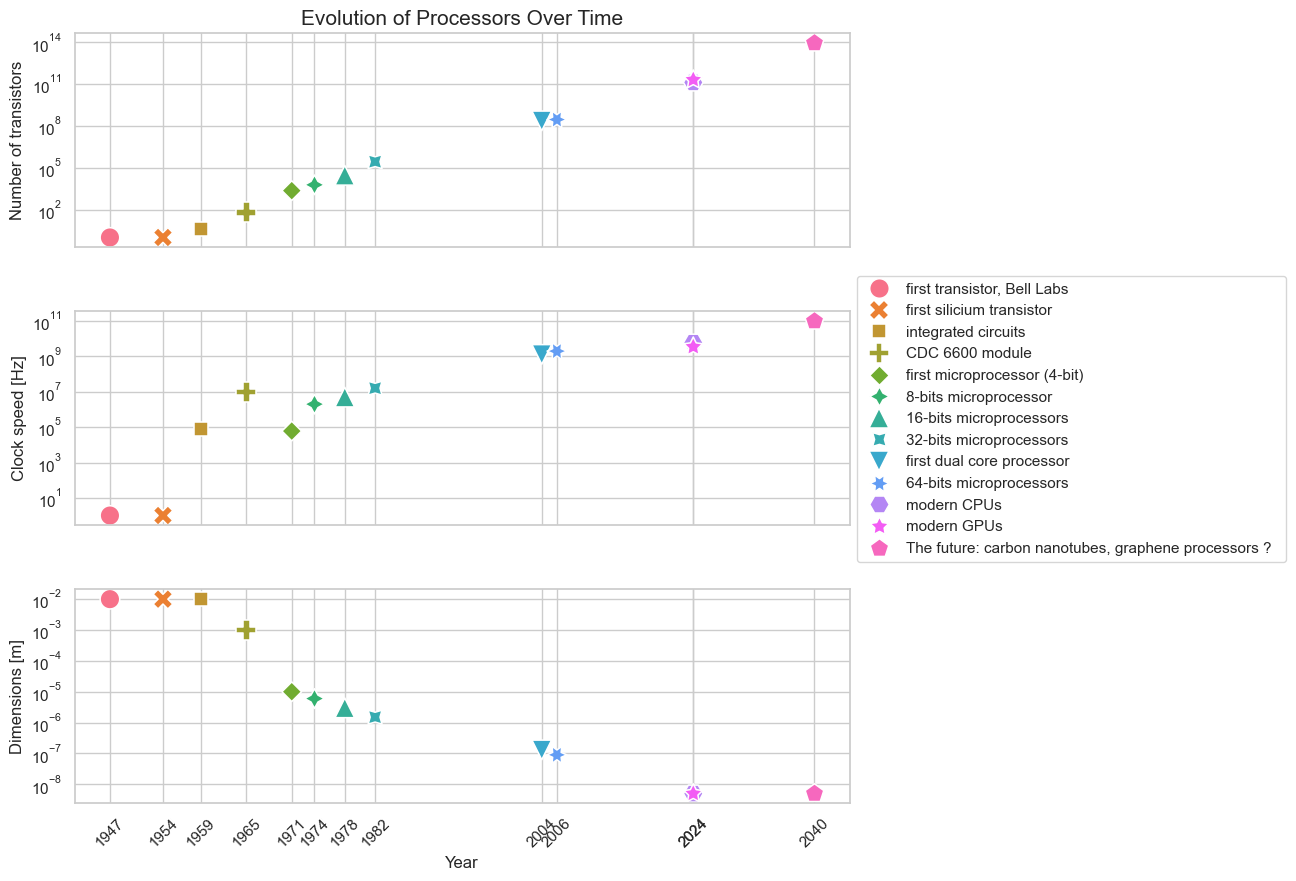

In [137]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Plotting the first scatterplot
sns.scatterplot(data=df1, x='date', y='n_transistors', style="Object", hue='Object', s=200, ax=axes[0])
axes[0].set_yscale("log")
axes[0].set_ylabel("Number of transistors")
axes[0].set_title('Evolution of Processors Over Time', fontsize=15)
axes[0].get_legend().remove()

# Plotting the second scatterplot
sns.scatterplot(data=df1, x='date', y='clock_speed_Hz', style="Object", hue='Object', s=200, ax=axes[1])
axes[1].set_yscale("log")
axes[1].set_ylabel("Clock speed [Hz]")  # Change the label accordingly
axes[1].get_legend().remove()  # Remove legend from the second plot

# Plotting the third scatterplot
sns.scatterplot(data=df1, x='date', y='dimension_m', style="Object", hue='Object', s=200, ax=axes[2])
axes[2].set_yscale("log")
axes[2].set_ylabel("Dimensions [m]")  # Change the label accordingly
axes[2].set_xlabel("Year")
axes[2].set_xticks(df1['date'])  # Set xticks for the third plot
axes[2].tick_params(axis='x', rotation=45)  # Rotate xticks for the third plot
axes[2].get_legend().remove()

# Move legend outside the plot for the second plot
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1.2))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.3)

# Save or show the plot
plt.savefig('./all_plots.jpg', dpi=100, bbox_inches='tight')
plt.show()

In [145]:
df= pd.read_excel("chips.ods", engine="odf", sheet_name=1)

df.head(10)


Year                       Computer  \
0  1958               Ferranti Mercury   
1  1961                        IBM 790   
2  1963                       IBM 7090   
3  1965                       CDC 6600   
4  1972                       CDC 7600   
5  1976                        IBM 370   
6  1980      VAXes and Mini-computers    
7  1988                           CRAY   
8  1990  Apollo workstations and SHIFT   
9  2005                      PC farms    

                                  Experiment at CERN  \
0  SC (Synchro cyclotron) - Bubble chamber experi...   
1  PS (proton synchrotron) - First evidence of an...   
2                                                      
3                                                      
4  ISR (intersecting storage ring) - Gargamelle b...   
5  SPS (super proton synchrotron) - Proton antipr...   
6  SPS (super proton synchrotron) - UA1 and UA2 d...   
7  LEP (large electron positron collider) - Study...   
8                                                      
9                                                      

                                     Detectors   
0                                bubble chamber  
1                                           NaN  
2                                           NaN  
3                                           NaN  
4  gargamelle bubble chamber – neutral currents  
5                  UA1 and UA2 – W and Z bososn  
6                                           NaN  
7                   ALEPH, DELPHI, L3 and OPAL   
8                                           NaN  
9         ATLAS, CMS, ALICE, LHCb – Higgs boson

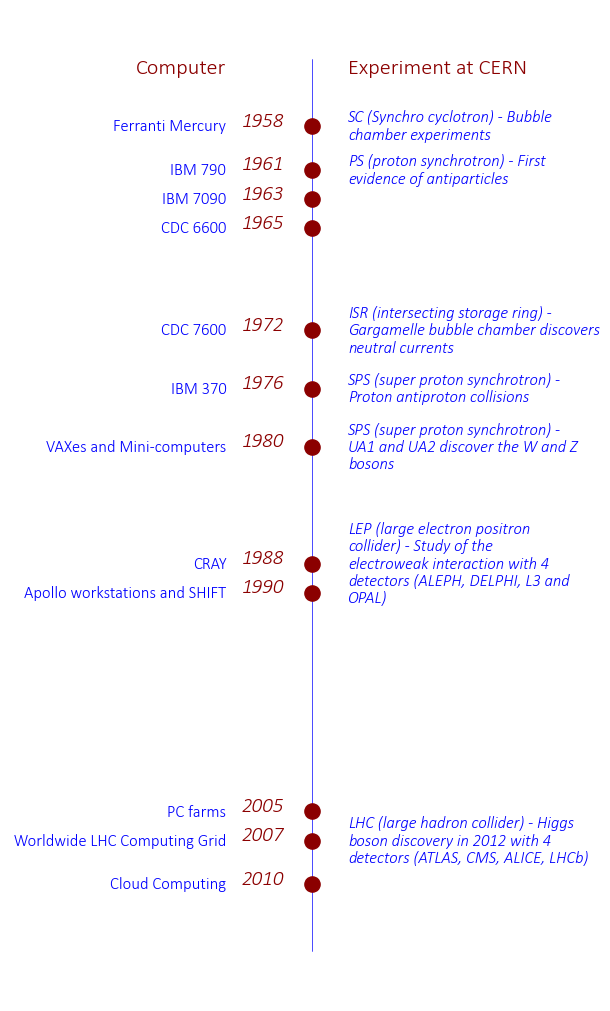

In [148]:
df = df.sort_values(by='Year')

max_width_right = 35  # Adjust as needed
max_width_left = 30  # Adjust as needed

# Plotting the timeline
fig, ax = plt.subplots(figsize=(6, 10), constrained_layout=True)
min_year = int(df['Year'].min())
max_year = int(df['Year'].max()) 
ax.set_xlim(-40, 40)  # Adjusting x-axis limits to extend the line
ax.set_ylim(max_year+8, min_year-8)  # Inverted y-limits
ax.axvline(0, ymin=0.05, ymax=0.95, c='blue', linewidth=0.5, zorder=1)

# Plotting dots for 'Year' column
ax.scatter([0] * len(df['Year']), df['Year'], s=120, c='darkred', zorder=2)

# Adding year labels
label_offsets = [-8.0] * (len(df['Year']))
for i, year in enumerate(df['Year']):
    ax.text(label_offsets[i], int(year), str(year), ha='center', color='darkred', fontfamily='Calibri', fontstyle='italic', fontweight='light', fontsize=15)

# Adding title for the three columns
ax.text(-14.0, min_year - 4, 'Computer', ha='right', va='center', color='darkred', fontfamily='Calibri', fontsize=16, fontweight='light')
ax.text(6.0, min_year - 4, 'Experiment at CERN', ha='left', va='center', color='darkred', fontfamily='Calibri', fontsize=16, fontweight='light')

# Adding labels for 'Computer' on the left
for i, computer in enumerate(df['Computer']):
    wrapped_text = textwrap.fill(str(computer), width=max_width_left)
    ax.text(-14.0, df['Year'].iloc[i], wrapped_text, ha='right', va='center', color='blue', fontfamily='Calibri', fontweight='light')

# Adding labels for 'Experiment at CERN' on the right with text wrapping
for i, experiment in enumerate(df['Experiment at CERN']):
    # Wrap the text to fit within the maximum width
    wrapped_text = textwrap.fill(str(experiment), width=max_width_right)
    # Add the wrapped text to the plot
    ax.text(6.0, df['Year'].iloc[i], wrapped_text, ha='left', va='center', color='blue', fontstyle='italic', fontfamily='Calibri', fontweight='light')

# Hide lines around chart
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Hide tick labels
ax.set_xticks([])
ax.set_yticks([])

plt.savefig('./timeline.jpg', dpi=600, bbox_inches='tight')

plt.show()